In [ ]:
import torch
import torchvision


train_mnist = torchvision.datasets.MNIST(
    "./data",
    train=True,
    download=True,
    transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307,), (0.3081,))
    ])
)

test_mnist = torchvision.datasets.MNIST(
    "./data",
    train=False,
    download=True,
    transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307,), (0.3081,))
    ])
)


In [11]:

class OneHotMNIST(torch.utils.data.Dataset):
    def __init__(self, dataset):
        self.dataset = dataset

    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, idx):
        img, cls = self.dataset[idx]
        oh = torch.zeros(10)
        oh[cls] = 1

        return oh, img[0, :, :]

In [8]:
class OHMNISTGenerator(torch.nn.Module):
    def __init__(self):
        super(OHMNISTGenerator, self).__init__()
        self.mlp = torch.nn.Sequential(
            torch.nn.Linear(10, 300),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(300, 28*28)
        )

    def forward(self, x):
        flat_output = self.mlp(x)
        return flat_output.view(x.shape[0], 28, 28)
    

torch.Size([3, 28, 28])

In [13]:
from tqdm import tqdm

train_ds = OneHotMNIST(train_mnist)
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=16, shuffle=True)

model = OHMNISTGenerator().to("cuda")
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(0, 3):
    for x, y in tqdm(train_dl):
        x = x.to("cuda")
        y = y.to("cuda")
        
        output = model(x)
        loss = loss_fn(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        

100%|██████████| 3750/3750 [00:10<00:00, 348.17it/s]


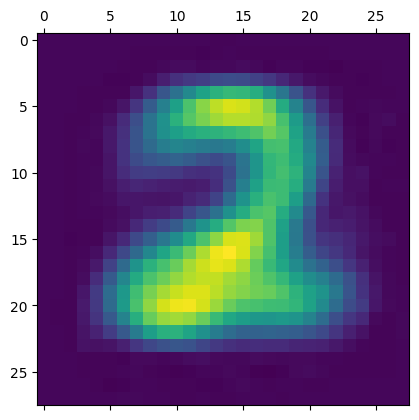

In [21]:
from matplotlib import pyplot as plt

model = model.cpu()
input = torch.zeros(1, 10)
input[0, 2] = 1

output = model(input)
plt.matshow(output.detach().cpu().numpy()[0])
